In [1]:

'''
- 결측치 처리
- Normalize
- feature_selection
'''


'\n- 결측치 처리\n- Normalize\n- feature_selection\n'

In [2]:
'''
기온(°C)  ->  spline
강수량(mm)  ->  0 + 분자료
풍속(m/s)  ->  spline
습도(%)  ->  spline
증기압(hPa)  ->  spline
이슬점온도(°C)  ->  spline
현지기압(hPa)  ->  spline
해면기압(hPa)  ->  spline
일조(hr)  ->  0
일사(MJ/m2)  ->  0
적설(cm)  ->  0
전운량(10분위)  ->  linear
시정(10m)  ->  ?
지면온도(°C)  ->  spline
지중온도(°C)  ->  ?
'''

import pandas as pd
import numpy as np
import data_utils


data_obs = pd.read_csv('data_obs.csv')


c_spline = ['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)','해면기압(hPa)', 
            '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)','20cm 지중온도(°C)', '30cm 지중온도(°C)']

c_linear = ['전운량(10분위)', "풍향(16방위)"]


data_utils.dataframe_interpolation_by_spline(data_obs, c_spline)
data_utils.dataframe_interpolation_by_linear(data_obs, c_linear)

value = {"강수량(mm)":0, "적설(cm)":0, "일조(hr)":0, "일사(MJ/m2)":0, "시정(10m)":np.mean(data_obs["시정(10m)"]), "전운량(10분위)":0}


data_obs.fillna(value, inplace=True)


data_obs = data_utils.wind_direction_dummies(data_obs, "풍향(16방위)", True)







processing time : 16.800743341445923 s
processing time : 0.003134012222290039 s


/home/donggyu/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/donggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/donggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


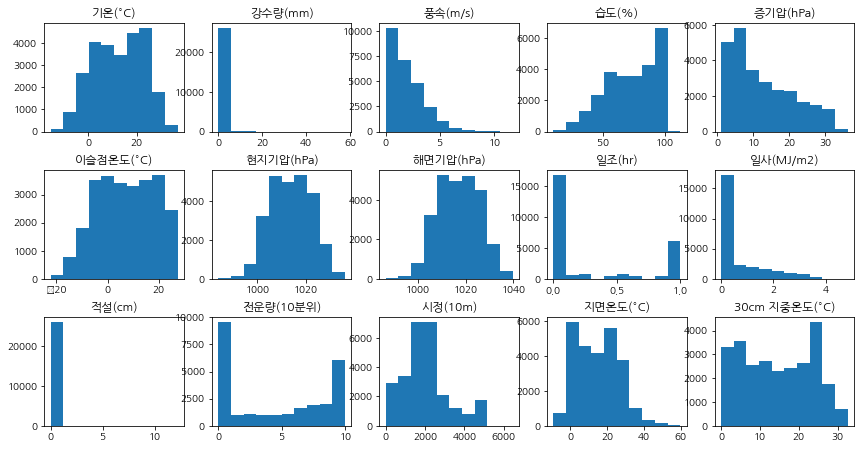

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'


exclude_column_list = ["time", "5cm 지중온도(°C)", "10cm 지중온도(°C)", "20cm 지중온도(°C)", "풍향(16방위)_1.0", "풍향(16방위)_2.0", "풍향(16방위)_3.0", "풍향(16방위)_4.0",
                       "풍향(16방위)_5.0", "풍향(16방위)_6.0", "풍향(16방위)_7.0", "dangjin_floating"]

# data_obs = data_utils.dataframe_normalize(data_obs, exclude_column_list)

data_utils.hist_features(data_obs, exclude_column_list)

    

In [4]:
'''
3시간기온 --> pass + spline
습도 --> pass + spline
풍향 --> pass + linear + 8방위 변환 + 더미화
풍속 --> pass + linear
하늘상태 --> pass + linear
강수형태 --> pass + linear
6시간강수 --> 배분하기.
6시간적설 --> 배분하기.
일최고기온 --> pass + spline
일최저기온 --> pass + spline
강수확률 --> pass + linear
'''


data_fcst = pd.read_csv('data_fcst.csv')

data_fcst = data_utils.fcst_augment(data_fcst)

data_fcst = data_utils.nona_mugja(data_fcst)


data_utils.dataframe_interpolation_by_spline(data_fcst, ["3시간기온", "습도", "일최고기온", "일최저기온"])
data_utils.dataframe_interpolation_by_linear(data_fcst, ["풍향", "풍속", "하늘상태", "강수형태", "강수확률", "6시간강수량", "6시간적설"])

data_fcst = data_utils.dataframe_normalize(data_fcst, ["time_index", "풍향"])

data_fcst = data_utils.wind_direction_dummies(data_fcst, "풍향", False)



processing time : 5.2044618129730225 s
processing time : 0.013126134872436523 s


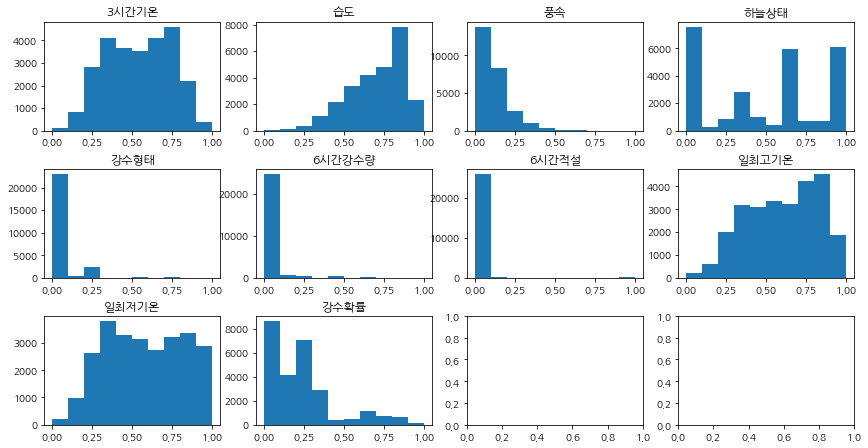

In [5]:
# "풍향_1.0", "풍향_2.0", "풍향_3.0", "풍향_4.0", "풍향_5.0", "풍향_6.0", "풍향_7.0"

data_utils.hist_features(data_fcst, ["time_index", "풍향_1.0", "풍향_2.0", "풍향_3.0", "풍향_4.0", "풍향_5.0", "풍향_6.0", "풍향_7.0"])